## Setup

In [1]:
%matplotlib widget

from pyCascade import probePost, physics
from matplotlib import pyplot as plt
import numpy as np

# working_dir = pathlib.Path().absolute()
working_dir = '/home/nbachand/Documents/Cascade/city_block'


In [2]:
LES_params = {
    'uStar': 0.1,
    'z0': 0.61,
    'disp': 11.1,
    'vK_const': 0.4,
    'Dt': .01
}
physics_setup = physics.LES_Physics(LES_params)

In [3]:
probes = probePost.Probes(f'{working_dir}/CHARLES/probes/probesOut')
probes.get_locations(f'{working_dir}/CHARLES/probes/locations')

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 2 seconds
memorizing data took 0 seconds
plotting took 2 seconds


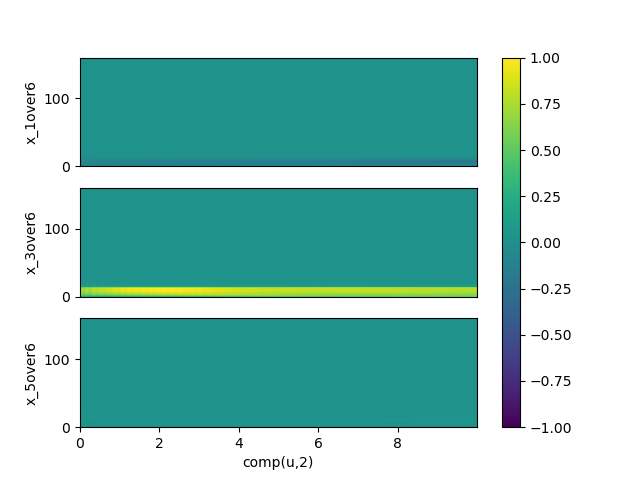

In [5]:
plot_params = {
    'plot_levels' : {
        # 'comp(u,0)' : np.linspace(0,.5,256),
        # 'comp(u,2)' : np.linspace(-1,1,256)
    },
    'horizontal spacing' : physics_setup.LES_params['Dt'],
    'stack span' : 'y',
    'x label': 'time [s]',
    'y label' : 'height [m]'
}

# slice = probes.slice_into_df(slice_params)
(fig, ax) = probes.contour_plots(
    # names = ['x_1over6','x_3over6'], 
    steps = probes.probe_steps[0:1000],
    vars = ['comp(u,2)'],
    parrallel = True,
    plot_params = plot_params
    )


In [5]:
plt.savefig(f'{working_dir}/CHARLES/probes/plots/velocity_contour')

In [11]:
plot_params = {
    'plot_levels' : {
        'comp(u,0)' : np.linspace(0,.5,200),
        'comp(u,1)' : np.linspace(0,4,200),
        'comp(u,2)' : np.linspace(0,.5,200)
    },
    'horizontal spacing' : physics_setup.LES_params['Dt'],
    'stack span' : 'y',
    'x label': 'time [s]',
    'y label' : 'height [m]'
}

# slice = probes.slice_into_df(slice_params)
(fig, ax) = probes.contour_plots(
    # names = ['x_1over6','x_3over6'], 
    steps = probes.probe_steps[0:10000],
    # vars = ['comp(u,0)', 'comp(u,1)'],
    parrallel = True,
    processing = [probePost.mean_convergence],
    plot_params = plot_params
    )

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 15 seconds
memorizing data took 6 seconds
processing data took 2 seconds
plotting took 83 seconds
Error in callback <function flush_figures at 0x7f1f6041fe50> (for post_execute):


KeyboardInterrupt: 